# German Credit Risk Analysis

Author: Catalin Pisica <br>
Email: catalinpisica5@gmail.com <br>
Phone Number: +31 687 627 954 <br>
LinkedIn: https://www.linkedin.com/in/catalinpisica5 <br>
Portfolio: https://catalinpisica.github.io/
## Research Questions
1. What is the overall distribution of good and bad credit risks in the dataset? What percentage of individuals fall into each category?
2. Investigate how various independent variables (age, gender, job type, housing situation, savings accounts, checking account balance, credit amount, credit duration, purpose of loan) are related to the credit risk classification. Examine the distribution and patterns to identify potential insights that may influence the development of a predictive classification model for credit risk.
3. Can we build a predictive model to classify individuals into good or bad credit risks based on the provided attributes (age, job, housing, etc.)?
4. What are the key factors that contribute most to the classification of an individual as a good or bad credit risk?


In [2]:
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [3]:
# Read the dataset

data = pd.read_csv("D:/Catalin/Job Applications/Portofolio/Projects/German Credit Risk Analysis Python/german_credit_dataset.csv", index_col = 0)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


Each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. 
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
10. Risk (text: good, bad)

Usefull information: It is worse to class a customer as good when they are bad, than it is to class a customer as bad when they are good

# Part 1. Data Preparation

## Data Inspection

In [4]:
# Look at the last rows of the data
data.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [5]:
# Check the shape of the data
data.shape

(1000, 10)

In [6]:
# Check the name of the columns
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [7]:
# Check the type of each column
data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [8]:
# For consistancy, we modify the Job variable to a text format

data['Job'] = data['Job'].replace({0:'Unskilled and non-resident', 1: 'Unskilled and resident', 2:'Skilled', 3:'Highly skilled'})

In [9]:
# Look at some basic descriptive statistics of the continuous variables
data.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [10]:
# Look at descriptive statistics of categoical variables
categorical_columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
for col in categorical_columns:
    print(f'-{col}- unique values: \n{data[col].value_counts()} \n')

-Sex- unique values: 
male      690
female    310
Name: Sex, dtype: int64 

-Job- unique values: 
Skilled                       630
Unskilled and resident        200
Highly skilled                148
Unskilled and non-resident     22
Name: Job, dtype: int64 

-Housing- unique values: 
own     713
rent    179
free    108
Name: Housing, dtype: int64 

-Saving accounts- unique values: 
little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64 

-Checking account- unique values: 
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64 

-Purpose- unique values: 
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64 

-Risk- unique values: 
good    700
bad     300
Name: Risk, dtype: int64 



## Data Preparation

In [11]:
# Checking the number of missing values
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

After gathering more information, there is evidence that the missing in the Savings accounts and Checking account column means that the customer doesn't have such an account open at this certain bank.

In [12]:
# Replacing missing values with the value 'absent'

data = data.fillna('absent')

In [13]:
# Re-check the number of missing values

data.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [14]:
# Checking duplicate values

data.duplicated().sum()

0

# Part 2. Data Exploration

## Univariate Analysis

In [15]:
# Understanding the dependent variable: Risk

data['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [16]:
risk_percentage = data['Risk'].value_counts()/len(data) *100
print(f'{risk_percentage[0]}% of customers are classified as good.\
      \n{risk_percentage[1]}% of customers are classified as bad.')

70.0% of customers are classified as good.      
30.0% of customers are classified as bad.


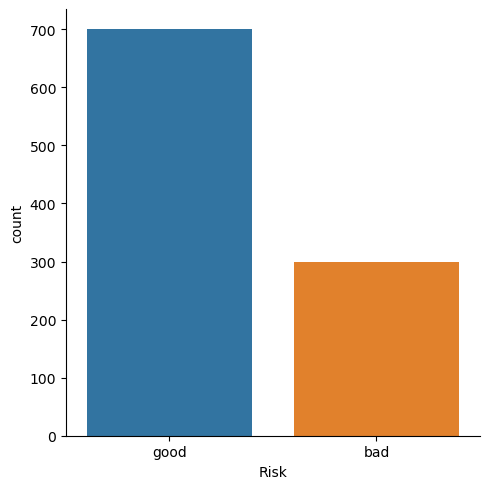

In [17]:
sns.catplot(x = 'Risk', data = data, kind = 'count')
sns.set_palette('RdBu_r')
plt.show()

Takeaways:

There are 700 (70%) of customers classified as good and 300 (30%) of customers classified as bad.

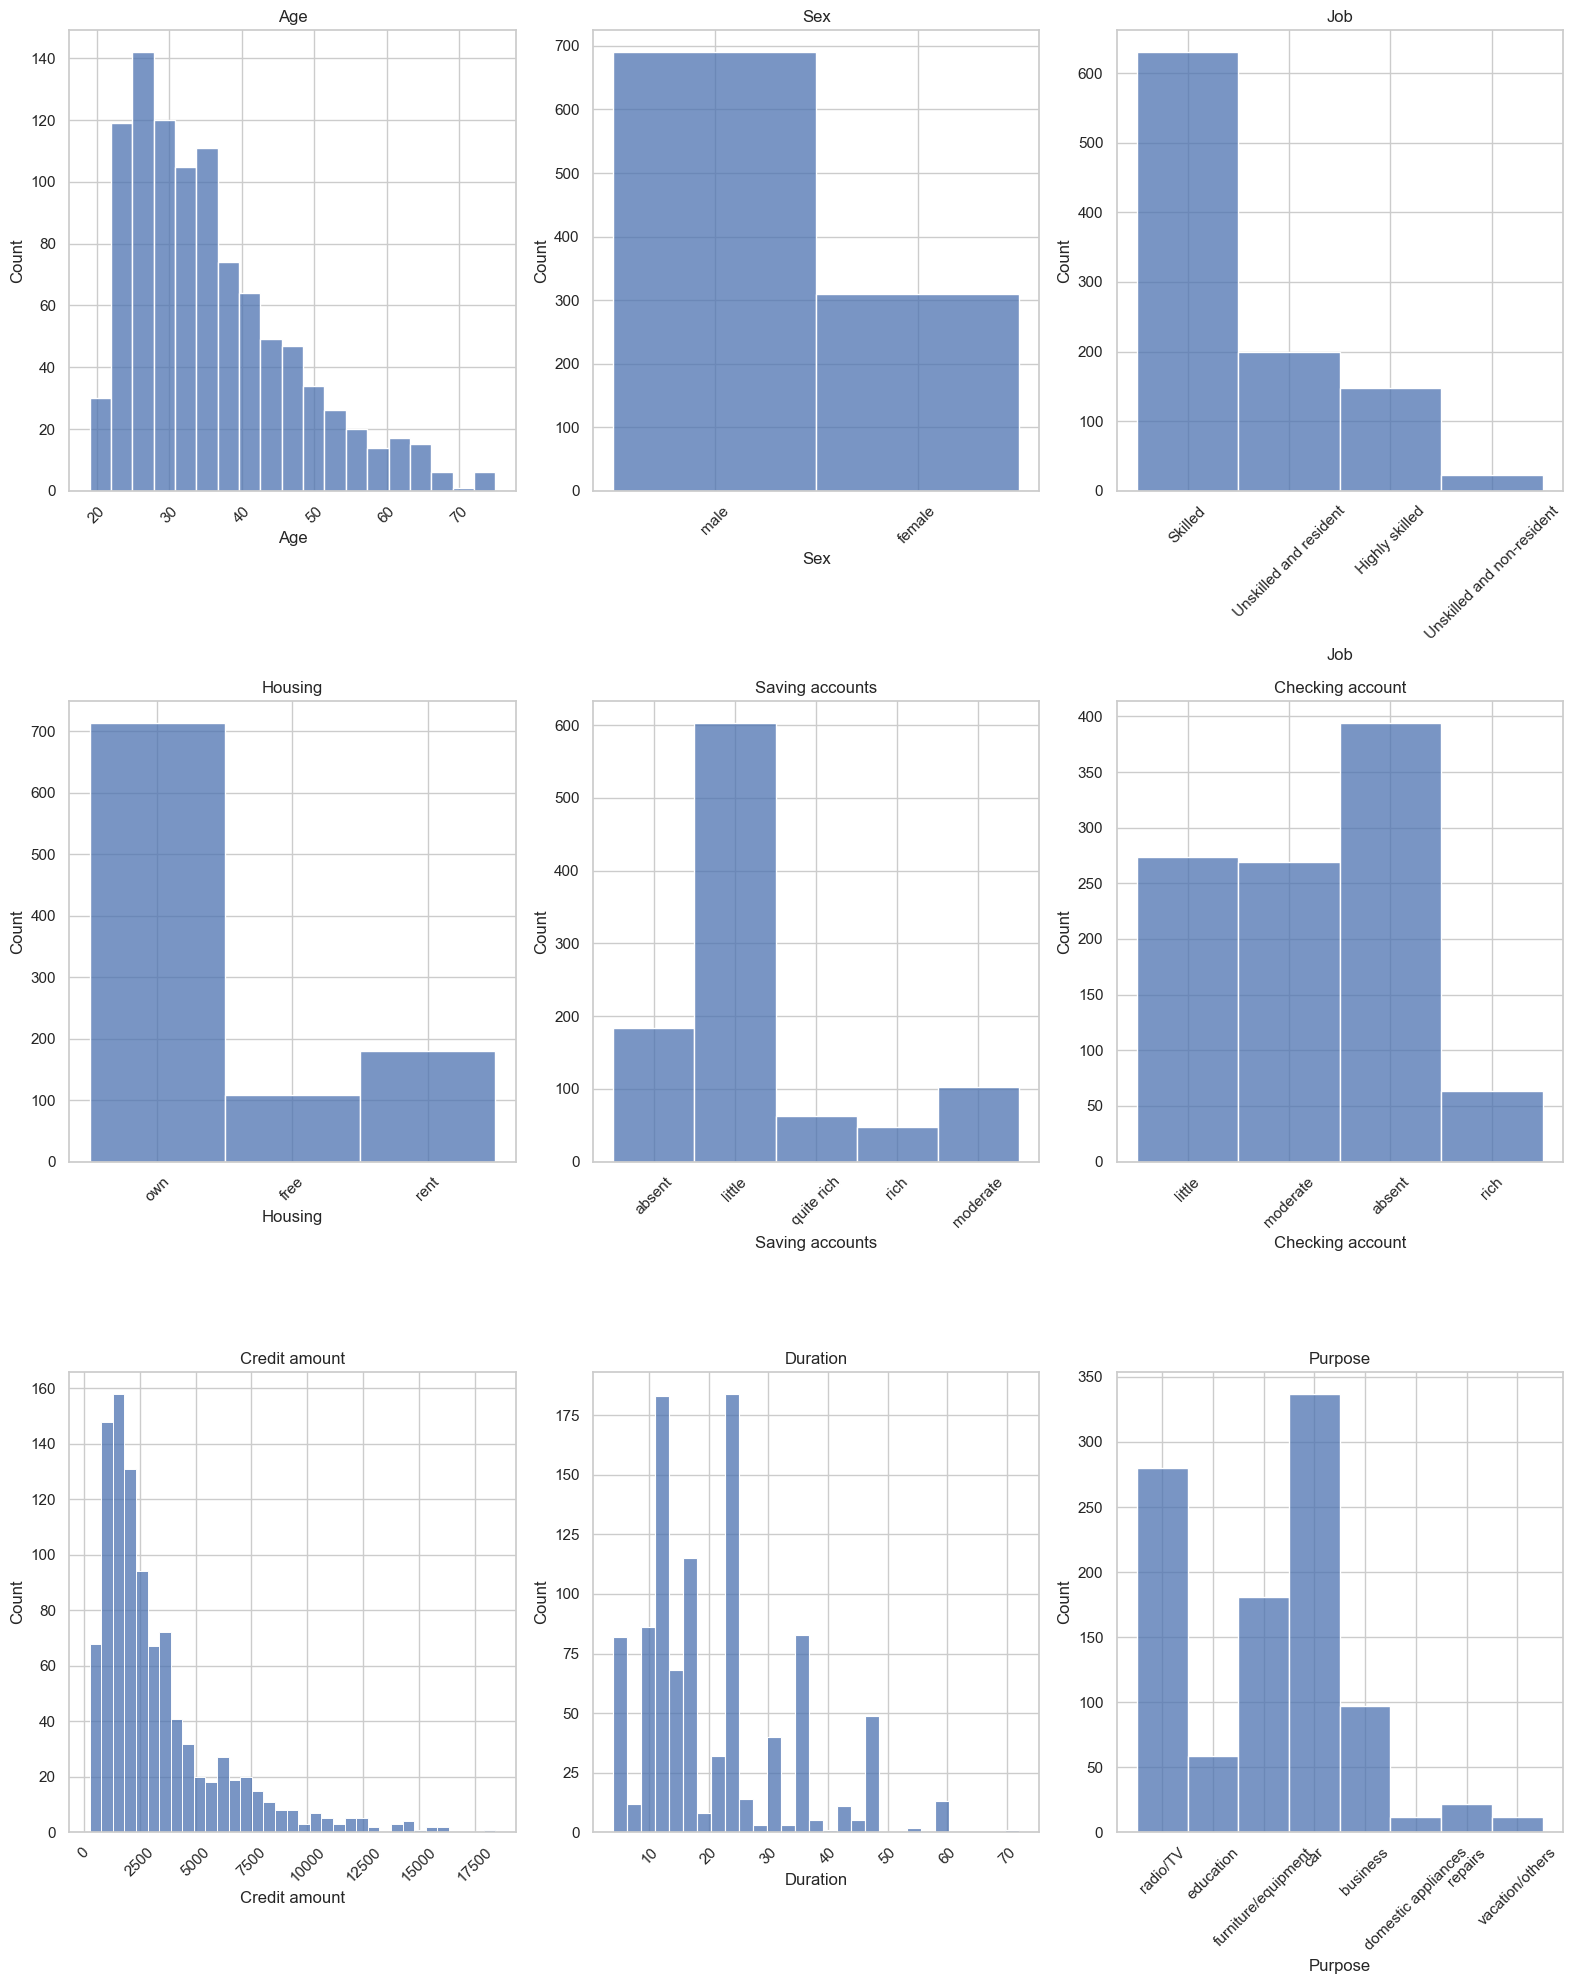

In [22]:
# Distribution plots for the independent variables

independent_vars = data.columns.drop('Risk')
sns.set(style='whitegrid')
fig, axs = plt.subplots(3, 3, figsize=(16, 20))
axs = axs.flatten()
for col, ax in zip(independent_vars, axs):
    sns.histplot(data[col], ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## Bivariate Analysis

In [23]:
# Examine the relationships with the continuous variables
continuous_vars = [col for col in data.columns if data[col].dtype=='int64']
def get_counts_continous(col1, col2, df):
    result = df.groupby(col1)[col2].describe()
    print(f'{col2}\n {result}\n')

for col in continuous_vars:
    get_counts_continous('Risk', col, data)

Age
       count       mean        std   min   25%   50%    75%   max
Risk                                                            
bad   300.0  33.963333  11.222379  19.0  25.0  31.0  40.00  74.0
good  700.0  36.224286  11.381145  19.0  27.0  34.0  42.25  75.0

Credit amount
       count         mean          std    min     25%     50%      75%      max
Risk                                                                          
bad   300.0  3938.126667  3535.818955  433.0  1352.5  2574.5  5141.50  18424.0
good  700.0  2985.457143  2401.472278  250.0  1375.5  2244.0  3634.75  15857.0

Duration
       count       mean        std  min   25%   50%   75%   max
Risk                                                          
bad   300.0  24.860000  13.282639  6.0  12.0  24.0  36.0  72.0
good  700.0  19.207143  11.079564  4.0  12.0  18.0  24.0  60.0



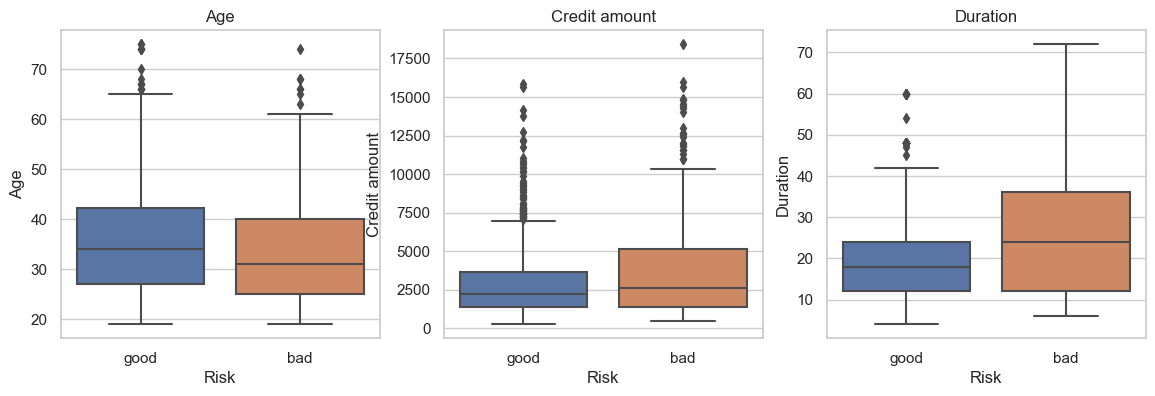

In [24]:
# Create box-plots between each continous variable and 'Risk'

sns.set(style='whitegrid')
fig, axs = plt.subplots(1,3, figsize=(14,4))
axs = axs.flatten()
for col, ax in zip(continuous_vars, axs):
    sns.boxplot(x = 'Risk', y = col, data = data, ax=ax)
    ax.set_title(col)
sns.set_palette('RdBu_r')
plt.show()

1. Age
- For customers labeled as 'bad' risk, the average age is approximately 34 years, with a standard deviation of 11.22.
- Customers labeled as 'good' risk have a slightly higher average age of around 36 years, with a similar standard deviation of 11.38.
2. Credit amount
- Bad' risk customers, on average, have a higher credit amount with a mean of 3938.13 and a larger standard deviation of 3535.82. This indicates a substantial degree of variability in credit amounts among 'bad' risk customers, with some having significantly higher credit amounts than the mean.
- 'Good' risk customers, on average, have a lower credit amount with a mean of 2985.46 and a standard deviation of 2401.47.Similarly, there is variability in credit amounts among 'good' risk customers, but the spread is not as wide as in the 'bad' risk category.
3. Duration
- 'Bad' risk customers have, on average, a longer credit duration with a mean of 24.86 months and a standard deviation of 13.28. 
- 'Good' risk customers, on average, have a shorter credit duration with a mean of 19.21 months and a standard deviation of 11.08.

In [25]:
# Perform a simple Logit Model for each IV and 'Risk' to formally test if there is a difference
y = data['Risk']
y = y.replace({'good':0, 'bad' : 1})
for col in continuous_vars:
    X = sm.add_constant(data[col])
    results = sm.Logit(y, X).fit()
    print(f'\nCoefficients for {col}\n{np.exp(results.params)}\n')
    print(f'P-values\n{results.pvalues}\n --------------------------')


Optimization terminated successfully.
         Current function value: 0.606572
         Iterations 5

Coefficients for Age
const    0.817979
Age      0.981729
dtype: float64

P-values
const    0.388216
Age      0.004158
dtype: float64
 --------------------------
Optimization terminated successfully.
         Current function value: 0.599532
         Iterations 5

Coefficients for Credit amount
const            0.292475
Credit amount    1.000112
dtype: float64

P-values
const            7.569116e-30
Credit amount    2.024791e-06
dtype: float64
 --------------------------
Optimization terminated successfully.
         Current function value: 0.588557
         Iterations 5

Coefficients for Duration
const       0.188935
Duration    1.038251
dtype: float64

P-values
const       6.214701e-30
Duration    4.626505e-11
dtype: float64
 --------------------------


Takeaways:

Age, Credit Amount, and Duration all show statistically significant associations with the 'Risk' variable.
1. Age:

For each one-unit increase in age, the odds of being classified as 'bad' risk decrease by approximately 1.8%.The low p-value suggests that the age variable is likely a significant predictor of the 'Risk' variable.

2. Credit Amount

For each one-unit (1000) increase in credit amount, the odds of being classified as 'bad' risk increase by approximately 0.01% (10%).The very low p-value indicates that the credit amount variable is a highly significant predictor of the 'Risk' variable.

3. Duration

For each one-unit (1 month) increase in duration, the odds of being classified as 'bad' risk increase by approximately 3.8%. The very low p-value suggests that the duration variable is a highly significant predictor of the 'Risk' variable.

In [26]:
# Explore the relationship with the categorical variables
def get_counts_categorical(col1, col2, df):
    result = df.groupby(col2)[col1].value_counts().unstack()
    print(f'--{col2}--\n{result}\n')

categorical_vars = [col for col in data.columns if (data[col].dtype == 'object') and (col!='Risk')]

for col in categorical_vars:
    get_counts_categorical('Risk', col, data)

--Sex--
Risk    bad  good
Sex              
female  109   201
male    191   499

--Job--
Risk                        bad  good
Job                                  
Highly skilled               51    97
Skilled                     186   444
Unskilled and non-resident    7    15
Unskilled and resident       56   144

--Housing--
Risk     bad  good
Housing           
free      44    64
own      186   527
rent      70   109

--Saving accounts--
Risk             bad  good
Saving accounts           
absent            32   151
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42

--Checking account--
Risk              bad  good
Checking account           
absent             46   348
little            135   139
moderate          105   164
rich               14    49

--Purpose--
Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
educati

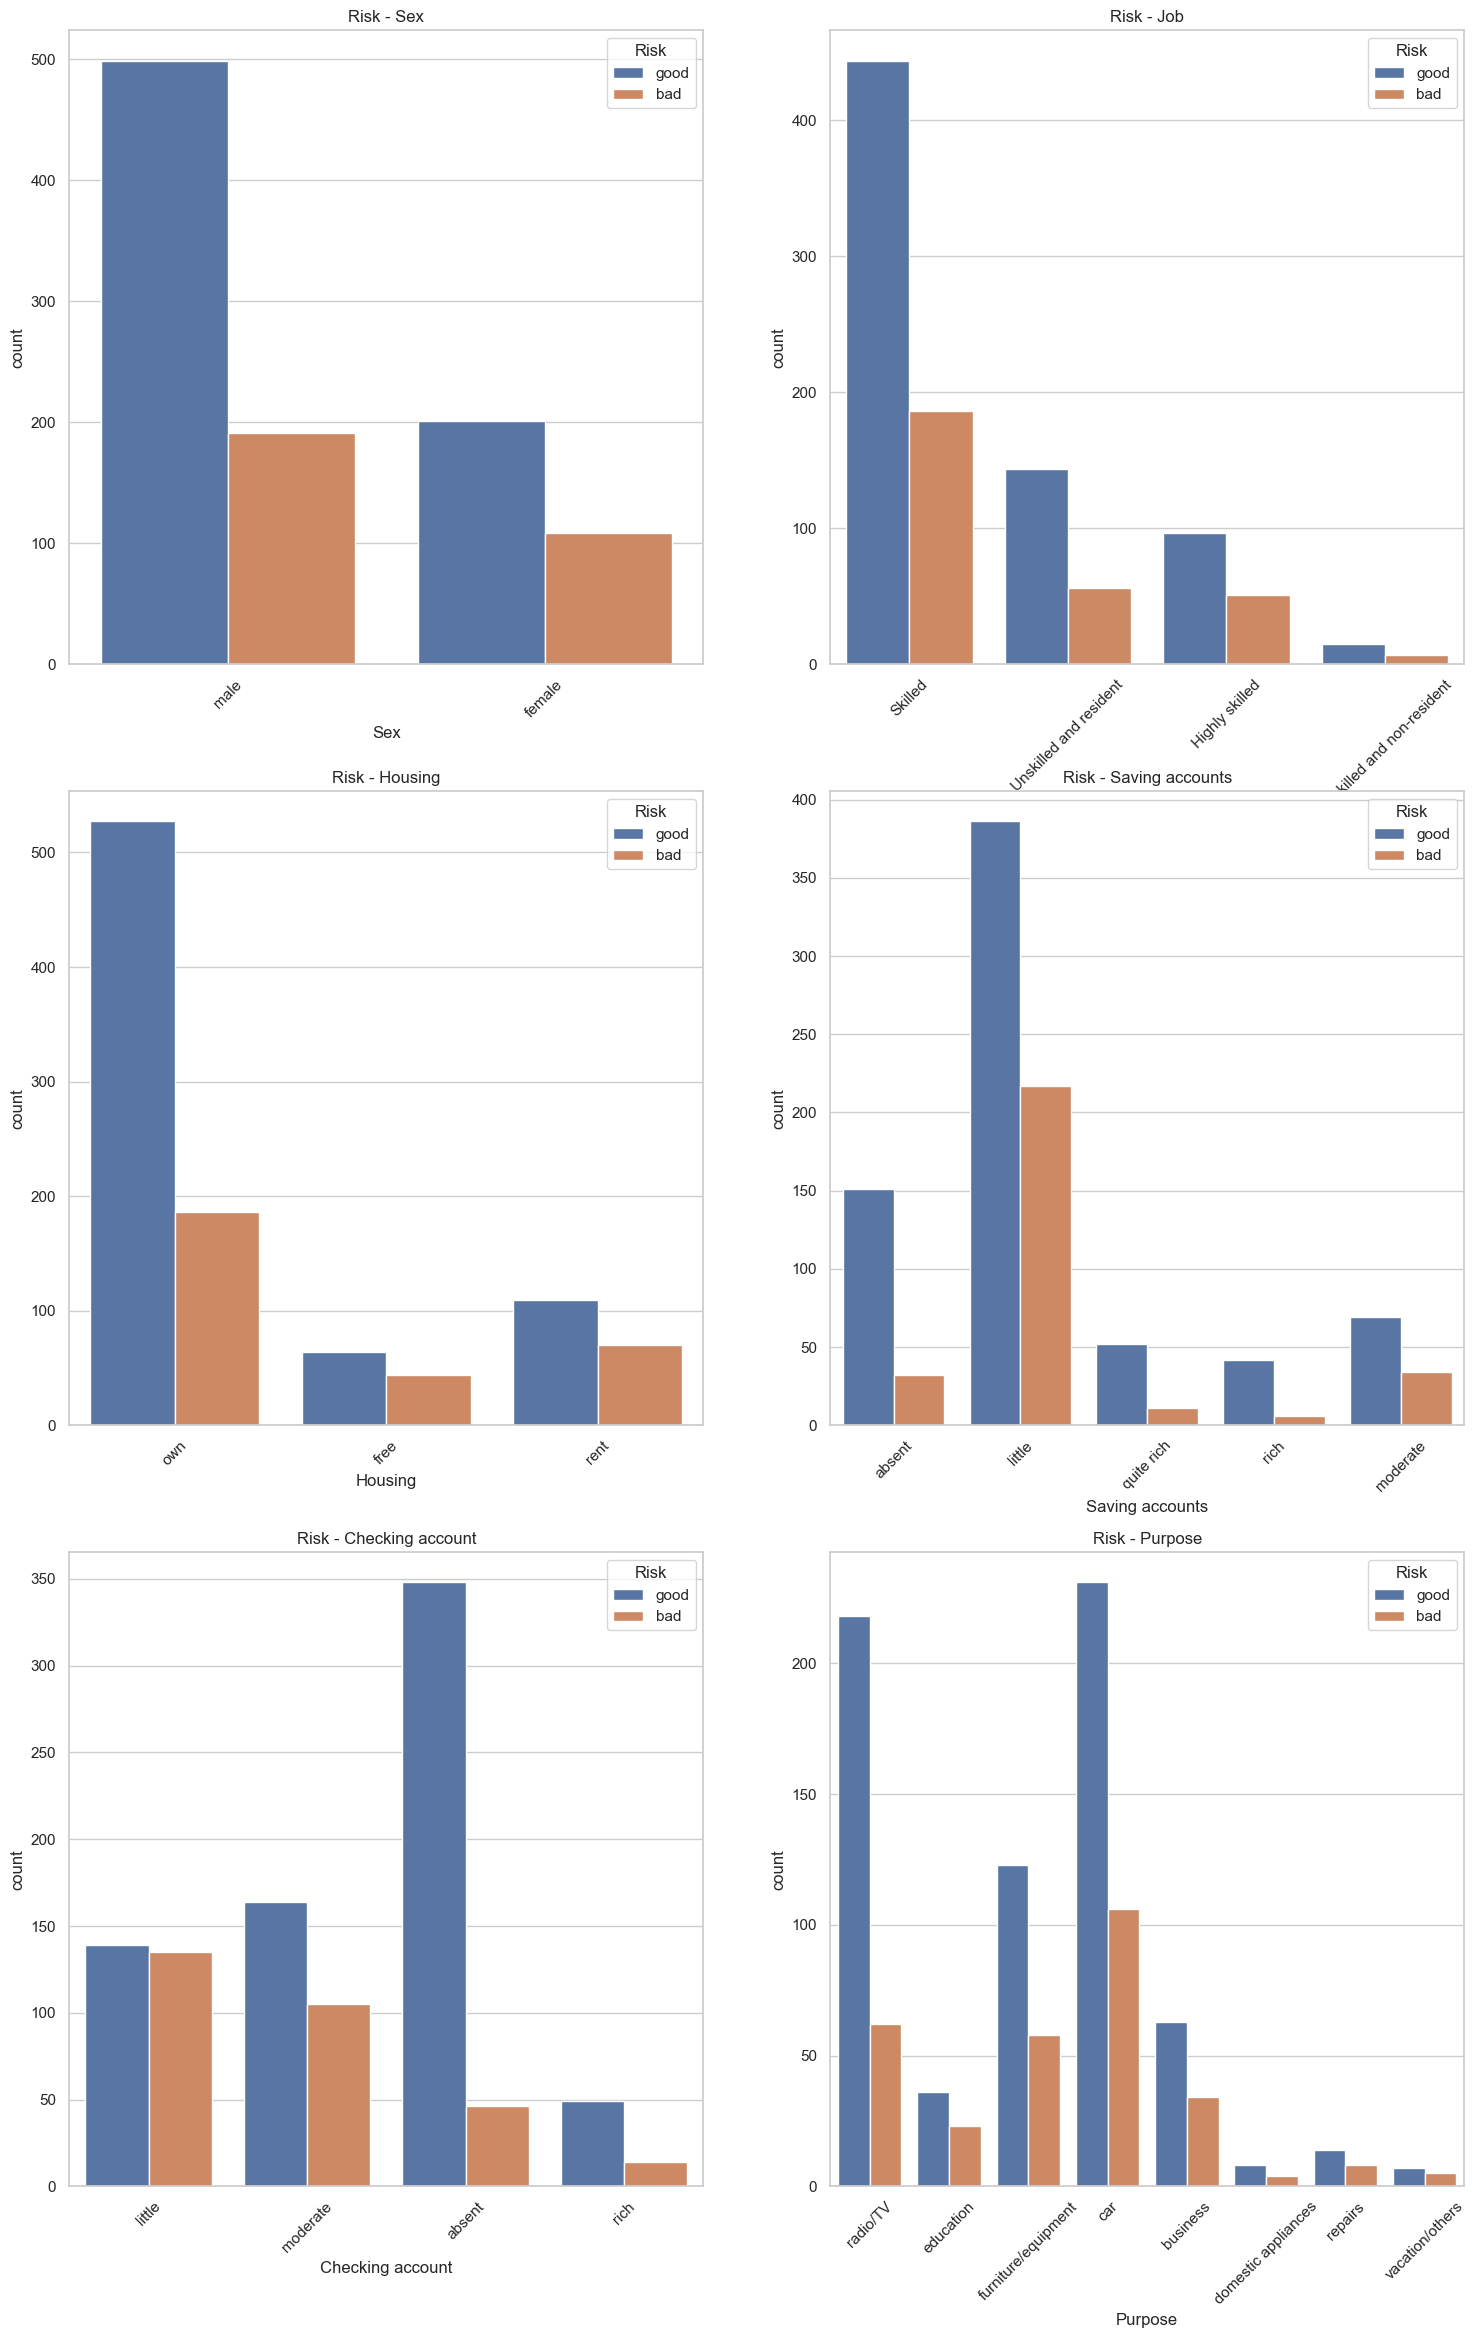

In [33]:
# Create a side-by-side bar chart to understand the distribution across each option

sns.set(style='whitegrid')
fix, axs = plt.subplots(3,2, figsize=(18,28))
axs = axs.flatten()

for col, ax in zip(categorical_vars, axs):
    sns.countplot(x = col, data = data, hue = 'Risk', ax = ax)
    ax.set_title(f'Risk - {col}')
    ax.tick_params(axis = 'x', rotation = 45)

plt.show()

In [34]:
# Calculate the percentage distributions and plot the results
def get_percentages(col1, col2, df):
    percentage_distribution = (df.groupby([col2, col1]).size() / df.groupby(col2).size()).reset_index(name = 'Percentage')
    return percentage_distribution

for col in categorical_vars:
    percentage_distribution = get_percentages('Risk', col, data)
    print(f'--{col}--\n{percentage_distribution}\n')

--Sex--
      Sex  Risk  Percentage
0  female   bad    0.351613
1  female  good    0.648387
2    male   bad    0.276812
3    male  good    0.723188

--Job--
                          Job  Risk  Percentage
0              Highly skilled   bad    0.344595
1              Highly skilled  good    0.655405
2                     Skilled   bad    0.295238
3                     Skilled  good    0.704762
4  Unskilled and non-resident   bad    0.318182
5  Unskilled and non-resident  good    0.681818
6      Unskilled and resident   bad    0.280000
7      Unskilled and resident  good    0.720000

--Housing--
  Housing  Risk  Percentage
0    free   bad    0.407407
1    free  good    0.592593
2     own   bad    0.260870
3     own  good    0.739130
4    rent   bad    0.391061
5    rent  good    0.608939

--Saving accounts--
  Saving accounts  Risk  Percentage
0          absent   bad    0.174863
1          absent  good    0.825137
2          little   bad    0.359867
3          little  good    0.640133
4

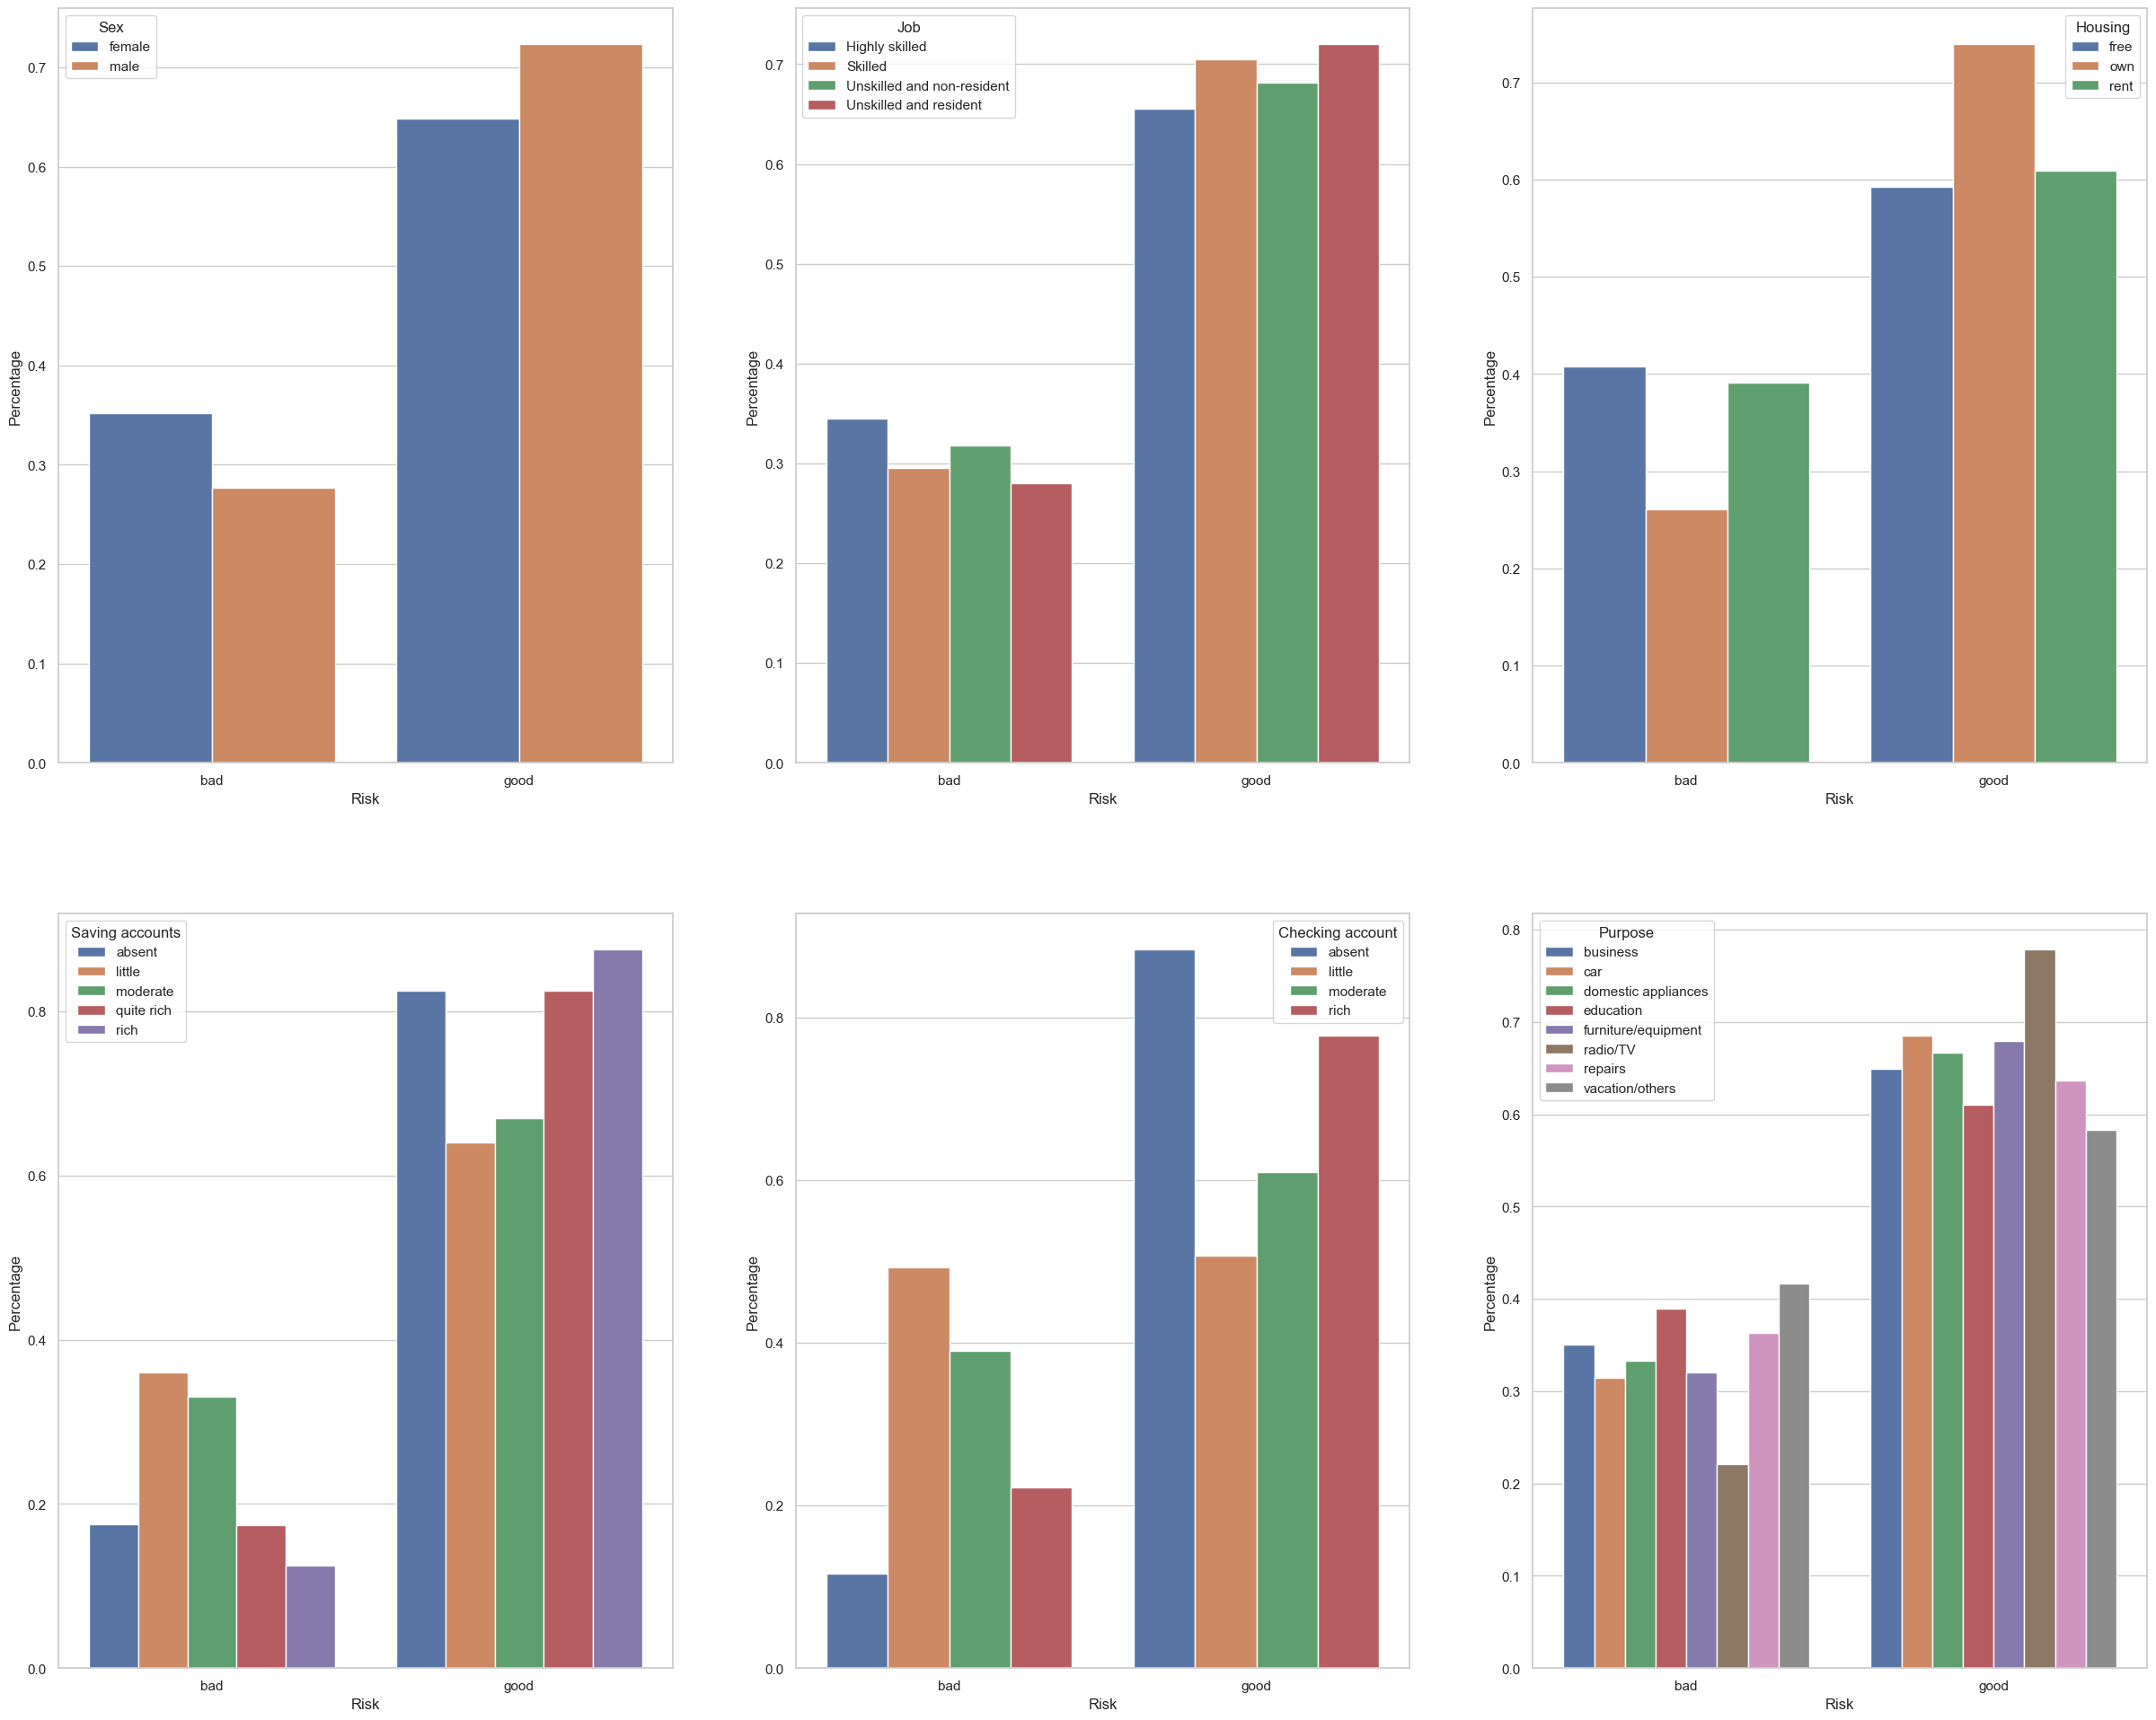

In [35]:
# Plot the percentages
sns.set(style = 'whitegrid')
fix, axs = plt.subplots(2,3, figsize=(30,24))
axs = axs.flatten()

for col, ax in zip(categorical_vars, axs):
    percentage_distribution = get_percentages('Risk', col, data)
    sns.barplot(x = 'Risk', y = 'Percentage', hue = col, data = percentage_distribution, ax=ax)
    
plt.show()

In [36]:
import scipy.stats as ss

# Perform the chi-square test to test formally the association between housing situation and credit risk
for col in categorical_vars:
    contingency_table = pd.crosstab(data[col], data['Risk'])
    chi2, p, dof, expected = ss.chi2_contingency(contingency_table)
    print(f"--{col}--\nChi-square statistic: {chi2:.4f}")
    print(f"P-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}\n")

--Sex--
Chi-square statistic: 5.3485
P-value: 0.0207
Degrees of freedom: 1

--Job--
Chi-square statistic: 1.8852
P-value: 0.5966
Degrees of freedom: 3

--Housing--
Chi-square statistic: 18.1998
P-value: 0.0001
Degrees of freedom: 2

--Saving accounts--
Chi-square statistic: 36.0989
P-value: 0.0000
Degrees of freedom: 4

--Checking account--
Chi-square statistic: 123.7209
P-value: 0.0000
Degrees of freedom: 3

--Purpose--
Chi-square statistic: 13.6421
P-value: 0.0579
Degrees of freedom: 7



Takeaways:

Gender, housing, saving accounts, and checking accounts are significant factors associated with credit risk, both in terms of percentages and chi-square test results.
Job category and purpose may not have a strong association with credit risk based on the chi-square test results, indicating that additional factors may need to be considered in the logistic regression model.

1. Sex:
- There are more male customers overall, and there are more 'good' risk cases among males.
- The percentage of 'good' risk is higher among males (72.32%) compared to females (64.84%), suggesting that proportionally, males have a better credit risk profile.
- The chi-square test indicates a statistically significant association between gender and credit risk.
2. Job:
- There are more skilled individuals overall, and a higher count of 'good' risk among skilled and unskilled residents.
- The percentage distribution shows the proportion of 'bad' and 'good' risk within each job category.
- The chi-square test suggests that there is no statistically significant association between job category and credit risk. While there are more skilled individuals, job category may not be a strong predictor of credit risk based on the chi-square test results. Job category alone might not provide sufficient information for precise credit risk assessment.
3. Housing:
- 'Own' housing has the highest count, indicating it is the most prevalent housing category.
- The proportion of 'good' risk is highest among those with 'own' housing (73.91%), suggesting that individuals with their own housing are likely to be lower credit risks.
- The chi-square test reveals a statistically significant association between housing and credit risk.

4. Saving accounts:
- 'Little' savings account holders have the highest count overall.
- The percentage distribution highlights varying risk proportions among different savings account categories.
- The chi-square test indicates a statistically significant association between saving accounts and credit risk.

5. Checking account:
- Customers with 'absent' checking accounts have the highest count overall.
- The percentage distribution provides a normalized view of credit risk within each checking account category.
- The chi-square test reveals a statistically significant association between checking accounts and credit risk.

6. Purpose:
- 'Car' and 'radio/TV' are the most prevalent purposes.
- The percentage distribution illustrates the proportion of 'bad' and 'good' risk within each purpose category.
- The chi-square test suggests that there is no statistically significant association between purpose and credit risk.

# Part 3. Model Building

## Data Preprocessing

In [37]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [38]:
# Convert categorical variable to category type

for col in categorical_vars:
    data[col] = data[col].astype('category')

In [39]:
# Creating a code-book
codes = []
categories = []

for col in categorical_vars:
    codes.append(data[col].cat.codes)
    categories.append(data[col])

name_map = {}

for col, code_series, category_series in zip(categorical_vars, codes, categories):
    name_map[col] = dict(zip(code_series, category_series))

name_map

{'Sex': {1: 'male', 0: 'female'},
 'Job': {1: 'Skilled',
  3: 'Unskilled and resident',
  0: 'Highly skilled',
  2: 'Unskilled and non-resident'},
 'Housing': {1: 'own', 0: 'free', 2: 'rent'},
 'Saving accounts': {0: 'absent',
  1: 'little',
  3: 'quite rich',
  4: 'rich',
  2: 'moderate'},
 'Checking account': {1: 'little', 2: 'moderate', 0: 'absent', 3: 'rich'},
 'Purpose': {5: 'radio/TV',
  3: 'education',
  4: 'furniture/equipment',
  1: 'car',
  0: 'business',
  2: 'domestic appliances',
  6: 'repairs',
  7: 'vacation/others'}}

In [40]:
# Encode dummy variables 
data_pred = data.copy()
data_pred['Sex'] = data_pred['Sex'].replace({'male':1, 'female':0})
data_pred['Sex'] = data_pred['Sex'].astype('int64')
data_pred['Risk'] = data_pred['Risk'].replace({'good':1, 'bad': 0})

In [41]:
data_pred = pd.get_dummies(data_pred, columns = ['Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], prefix = 'var', drop_first=True)

In [42]:
# Performing Standard scaling on the continuous variables

scaler = StandardScaler()

data_pred[continuous_vars] = scaler.fit_transform(data_pred[continuous_vars])

In [43]:
# Split data into features and target

X = data_pred.drop('Risk', axis=1).copy()
y = data_pred['Risk'].copy()

In [44]:
# Split the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 25)

In [45]:
# Check if the split was successfull
print(f'Train size: {round(len(X_train)/len(X) *100)}% \n\
Test size: {round(len(X_test)/len(X)*100)}%')

Train size: 70% 
Test size: 30%


## Data Modeling

In [55]:
# Defining a function for modeling 

def fitting_model(model):
    model = model
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42), scoring = 'precision')
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    # Use the best parameters to make predictions
    y_pred = best_model.predict(X_test)

    # Evaluate the best model using cross-validation with 5 folds

    cv_scores = cross_val_score(best_model, X_train, y_train, cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring = 'precision')

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    # Print cross-validation scores
    print(f'Precision: {round(metrics.precision_score(y_test, y_pred), 3)}')
    print(f'Recall: {round(metrics.recall_score(y_test, y_pred), 3)}')
    print(f'F1 Score: {round(metrics.f1_score(y_test, y_pred), 3)}')
    print(f'Avg CV_Score: {round(np.mean(cv_scores), 2)}')

## Logistic Regression

In [50]:
# Fitting and predicting using Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

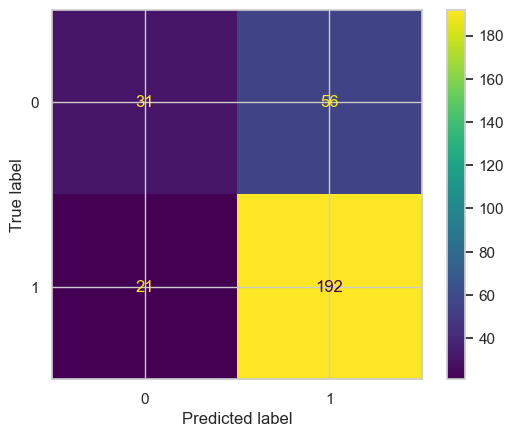

Precision: 0.774
Recall: 0.901
F1 Score: 0.833
Avg CV_Score: 0.76


In [51]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
cv_scores = cross_val_score(logreg, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='precision')
# Look at the scores
print(f'Precision: {round(metrics.precision_score(y_test, y_pred),3)}')
print(f'Recall: {round(metrics.recall_score(y_test, y_pred),3)}')
print(f'F1 Score: {round(metrics.f1_score(y_test, y_pred), 3)}')
print(f'Avg CV_Score: {round(np.mean(cv_scores),2)}')


## Support Vector Machine

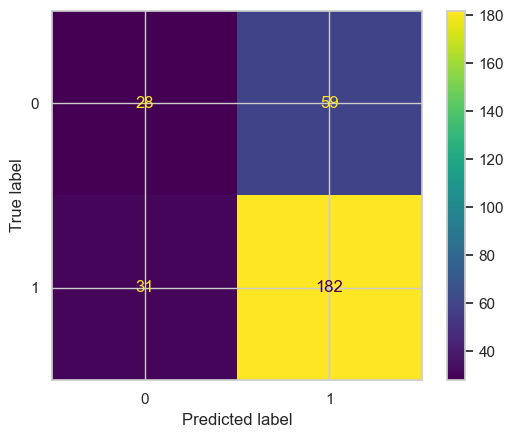

Precision: 0.755
Recall: 0.854
F1 Score: 0.802
Avg CV_Score: 0.79


In [56]:
# Define the parameters for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

fitting_model(SVC())

## Decision Trees

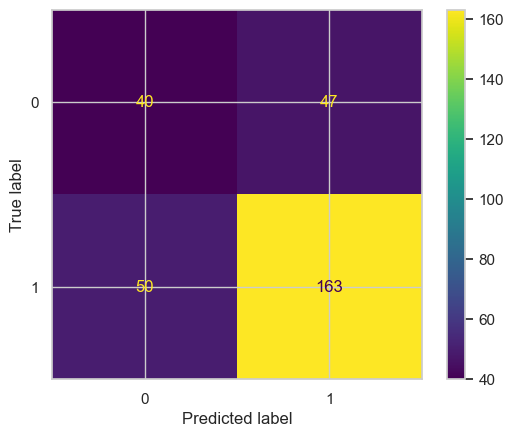

Precision: 0.776
Recall: 0.765
F1 Score: 0.771
Avg CV_Score: 0.77


In [57]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

fitting_model(DecisionTreeClassifier())

## Random Forest

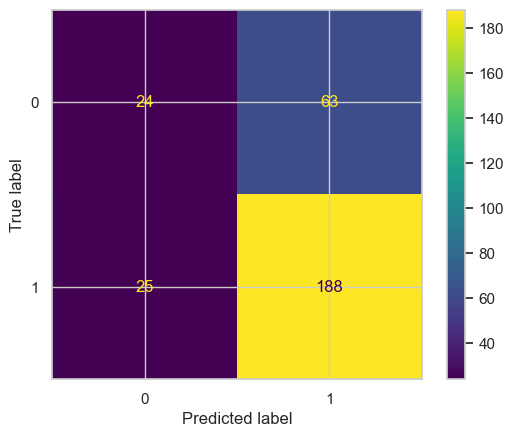

Precision: 0.749
Recall: 0.883
F1 Score: 0.81
Avg CV_Score: 0.77


In [58]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

fitting_model(RandomForestClassifier())

## Conclusion

In the context of predicting customer risk, where the goal is to discern between good (1) and bad (0) customers, the evaluation metrics play a crucial role in determining the model's effectiveness. The primary concern is to minimize the misclassification of bad customers as good, as this has potentially more severe consequences.

After thorough analysis of multiple machine learning models, the following conclusions can be drawn:
1. Logistic Regression:

- Offers a good balance between precision, recall, and F1 score.
- May be a suitable choice if a balanced approach to precision and recall is desired.

2. Support Vector Machine (SVM):

- Provides competitive precision, recall, and F1 score.
- Offers interpretability and simplicity in decision-making.

3. Decision Tree Classifier:

- Demonstrates high precision, recall, and F1 score.
- Particularly excels in minimizing false negatives (identifying bad customers).
- Recommended if the emphasis is on reducing the risk of misclassifying bad customers.


3. Random Forest:

- Balances precision, recall, and F1 score well.
- Shows high recall, making it effective in identifying bad customers.
- Suitable for scenarios where both precision and recall are crucial.

In the given context, where misclassifying bad customers as good is more detrimental, the Decision Tree model stands out due to its high precision. A precision score of 0.776 means that, among the instances predicted as positive (good customers), approximately 77.6% of them are correctly classified. However, the choice of the best model should also consider other factors such as interpretability, computational efficiency, and the trade-off between precision and recall based on the specific requirements of a specific application.

It is advisable to further validate these models on diverse datasets and consider the practical implications of their predictions in a real-world setting. Regular model updates and refinement based on evolving data patterns are also recommended to ensure continued accuracy and relevance.